# Interacting with the SMD

In [1]:
# Imports
import config as cf
import utils as ut

import pandas as pd
import numpy as np

## Connections

In [2]:
# Connect to DB
conn = ut.connect_db()

|---------------| Successfully connected to securities_master. |---------------|


## Simple Data Retrieval & Static Plotting

In [3]:
ticker = 'AAPL'

In [4]:
# Simple data call
data = ut.get_price_df(ticker, conn)
data.tail(10)

,adj_close_price
price_date,
2021-11-18,157.869995
2021-11-19,160.550003
2021-11-22,161.020004
2021-11-23,161.410004
2021-11-24,161.940002
2021-11-26,156.809998
2021-11-29,160.240005
2021-11-30,165.300003
2021-12-01,164.770004


In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

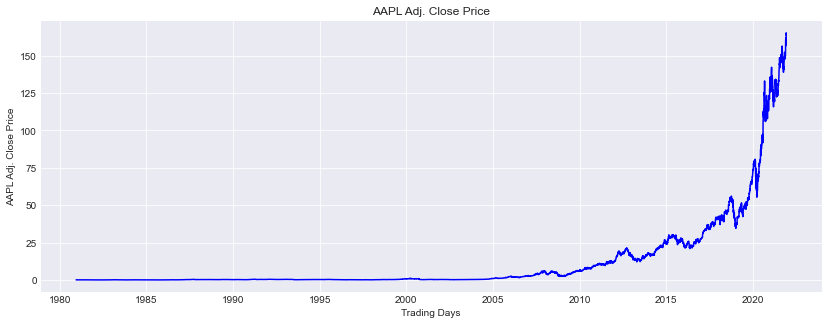

In [6]:
plt.figure(figsize = (14, 5))
plt.plot(data, 'b')
plt.grid(True)
plt.title('{} Adj. Close Price'.format(ticker))
plt.xlabel('Trading Days')
plt.ylabel('{} Adj. Close Price'.format(ticker))
plt.show()

In [7]:
data = data.tail(252)
data

,adj_close_price
price_date,
2020-12-03,122.186745
2020-12-04,121.500977
2020-12-07,122.991783
2020-12-08,123.617928
2020-12-09,121.033844
...,...
2021-11-26,156.809998
2021-11-29,160.240005
2021-11-30,165.300003


In [8]:
data['log_returns'] = np.log(data['adj_close_price'] / data['adj_close_price'].shift(1))
data['20_day_historical_volatility'] = 100 * data['log_returns'].rolling(window = 20).std()
data.tail(10)

,adj_close_price,log_returns,20_day_historical_volatility
price_date,,,
2021-11-18,157.869995,0.028136,1.206641
2021-11-19,160.550003,0.016834,1.229693
2021-11-22,161.020004,0.002923,1.225923
2021-11-23,161.410004,0.002419,1.226409
2021-11-24,161.940002,0.003278,1.215142
2021-11-26,156.809998,-0.032191,1.368512
2021-11-29,160.240005,0.021638,1.356398
2021-11-30,165.300003,0.031089,1.470855
2021-12-01,164.770004,-0.003211,1.482166


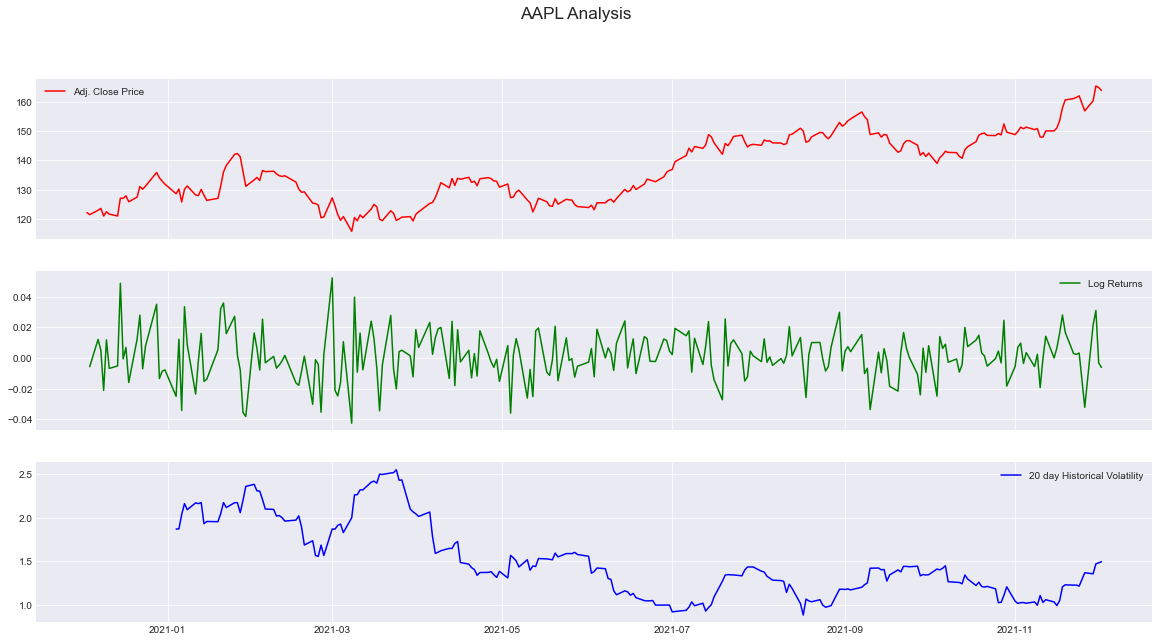

In [9]:
fig, axs = plt.subplots(3, sharex = True, figsize = (20, 10))
fig.suptitle('{} Analysis'.format(ticker), fontsize = 'xx-large')
axs[0].plot(data['adj_close_price'], 'r', label = 'Adj. Close Price')
axs[0].legend(loc = 'best')

axs[1].plot(data['log_returns'], 'g', label = 'Log Returns')
axs[1].legend(loc = 'best')

axs[2].plot(data['20_day_historical_volatility'], 'b', label = '20 day Historical Volatility')
axs[2].legend(loc = 'best')

## Detailed Data Retrieval & Interactive Plotting

In [ ]:
ticker = 'AAPL'

In [ ]:
# Sophisticated data call
data = ut.get_ohlcv_df(ticker, conn)
data = data.tail(252)
data

In [ ]:
import cufflinks as cuff
from IPython.display import display, HTML

cuff.set_config_file(sharing = 'public', theme = 'pearl', offline = True)

In [ ]:
data['adj_close_price'].iplot(kind = 'line', title = '{} Line Chart'.format(ticker), xTitle = 'Trading Days', yTitle = 'Adj. Close Price')

In [ ]:
data.iplot(kind = 'candle', rangeslider = True, title = '{} Candles'.format(ticker), xTitle = 'Trading Days', yTitle = 'OHLC')

In [ ]:
qf = cuff.QuantFig(data, title = '{} Quant Figure'.format(ticker), legend = 'top', name = 'data')
qf.add_bollinger_bands(periods = 20, boll_std = 2)
qf.add_volume()
qf.iplot()

In [ ]:
import plotly.io as pio
pio.renderers.default = "browser"

In [ ]:
qf = cuff.QuantFig(data, title = '{} Technical Analysis'.format(ticker), legend = 'top', name = 'data')
qf.add_bollinger_bands(periods = 20, boll_std = 2, colors = ['magenta', 'grey'], fill = True)
qf.add_sma([50, 150, 200], width = 3, color = ['green', 'lightgreen', 'lightblue'], legendgroup = True)
qf.add_rsi(periods = 20, color = 'java')
qf.add_macd()
qf.add_volume()
qf.iplot()

## Comparing Tickers & Indices

### Getting Index Constituents

In [ ]:
spy = ut.get_price_df('SPY', conn)
qqq = ut.get_price_df('QQQ', conn)
gld = ut.get_price_df('GLD', conn)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [ ]:
fig, axs = plt.subplots(3, sharex = True, figsize = (20, 10))
fig.suptitle('Index Tracking ETFs', fontsize = 'xx-large')
axs[0].plot(spy['adj_close_price'], 'r', label = 'SPY')
axs[0].legend(loc = 'best')

axs[1].plot(qqq['adj_close_price'], 'g', label = 'QQQ')
axs[1].legend(loc = 'best')

axs[2].plot(gld['adj_close_price'], 'b', label = 'GLD')
axs[2].legend(loc = 'best')

In [ ]:
sp500 = ut.get_SP500_constituents() # get list of S&P 500 tickers

In [ ]:
sp500_df = ut.get_ticker_info_from_list(sp500, conn)
sp500_df

### Comparing Tickers

In [ ]:
tickers = ['AAPL', 'AMZN', 'FB', 'F', 'GOOG', 'JNJ', 'SPY']

In [ ]:
tickers_df = ut.compare_tickers(tickers, conn)
tickers_df = tickers_df.tail(252)
tickers_df

#### Correlation of Daily Returns

In [ ]:
returns_df = tickers_df.pct_change()
returns_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
sns.jointplot('AAPL', 'GOOG', returns_df, kind = 'scatter')

In [ ]:
sns.pairplot(returns_df.dropna())

In [ ]:
corr_df = returns_df.corr(method = 'pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (14, 10))
plt.title('Correlation Heatmap', fontsize = 'xx-large')
sns.heatmap(corr_df, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0 , mask = mask, linewidths = 8.0)
plt.yticks(rotation = 0) 
plt.xticks(rotation = 90) 
plt.show()

#### Normalized Returns & Plotting

In [ ]:
returns_norm_df = tickers_df / tickers_df.iloc[0 , :]
returns_norm_df

In [ ]:
import cufflinks as cuff
from IPython.display import display, HTML
 
cuff.set_config_file(sharing = 'public', theme = 'pearl', offline = True)

In [ ]:
returns_norm_df.iplot(title = 'Normalized Returns of Ticker Selection', xTitle = 'Dates', yTitle = 'Normalized Returns')